# Tutorial of igraph 
参考：http://www.cs.rhul.ac.uk/home/tamas/development/igraph/tutorial/tutorial.html

python2.7  
igraph 0.7.1


#  1.starting igraph

In [1]:
import igraph

In [2]:
print igraph.__version__

0.7.1


In [3]:
from igraph import *

# 2.creating a graph from scratch 

In [4]:
g=Graph(1) #设立一个点

In [5]:
g

In [6]:
print g #一个点，零条边

IGRAPH U--- 1 0 --


In [7]:
g.add_vertices(2) #增加两顶点

In [8]:
g.add_edges([(0,1),(1,2)]) #igraph0.7 至少两条边

In [9]:
g.add_edges((5,0)) #一个错误的例子,体现了igraph的报错功能

TypeError: iterable must return pairs of integers or strings

In [10]:
g.add_vertices(3)

In [11]:
g.add_edges([(0,2),(2,3),(3,4),(4,5),(5,3)])

In [12]:
print g

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


In [13]:
g.get_eid(2,3)#通过两个顶点ID确定边ID

3

In [14]:
g.delete_edges(3)

In [15]:
summary(g)

IGRAPH U--- 6 6 -- 


# 3.Generating graphs

In [16]:
g1=Graph.Tree(127,2) #127顶点和每个顶点有两个子节点

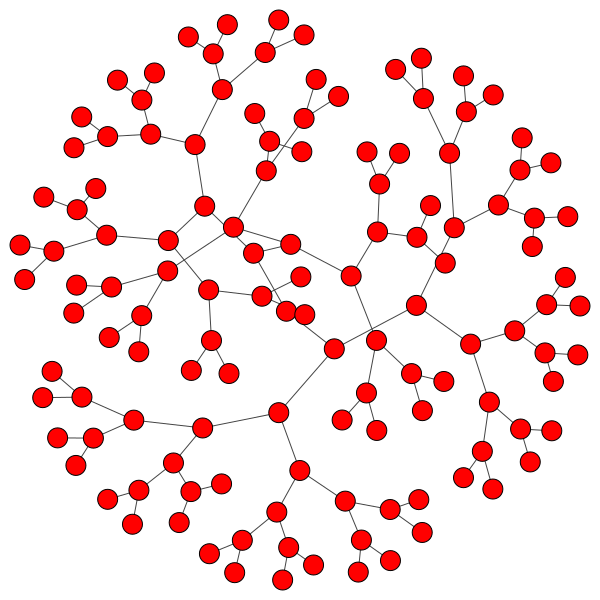

In [17]:
plot(g1)

In [18]:
summary(g1)

IGRAPH U--- 127 126 -- 


In [19]:
g2=Graph.Tree(127,2)

In [20]:
g2.get_edgelist()==g1.get_edgelist()

True

In [21]:
g2.get_edgelist()[0:10] #得到前10个元素

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (2, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10)]

In [22]:
# GRG:geometric random graph 几何随机图。
# 在单位正方形内部随机均匀地选择n个点，并且通过边缘连接彼此比预定距离d更接近的点对。 在我们的例子中，n是100，d是0.2。

g=Graph.GRG(100,0.2) 

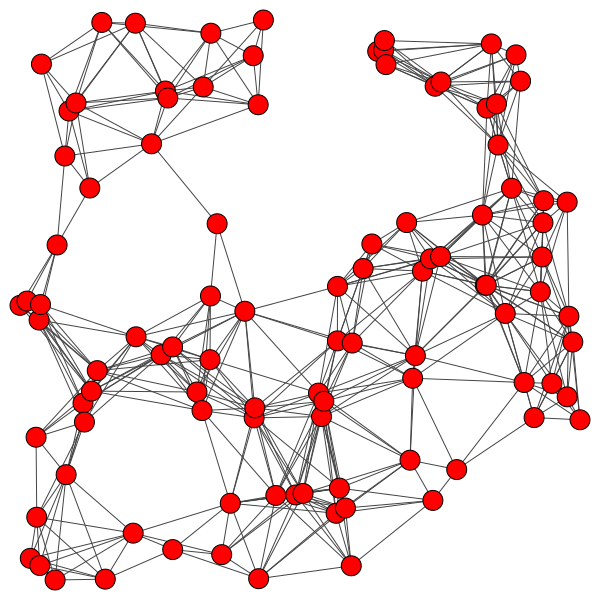

In [23]:
plot(g)

In [24]:
summary(g2)

IGRAPH U--- 127 126 -- 


In [25]:
g2=Graph.GRG(100,0.2)

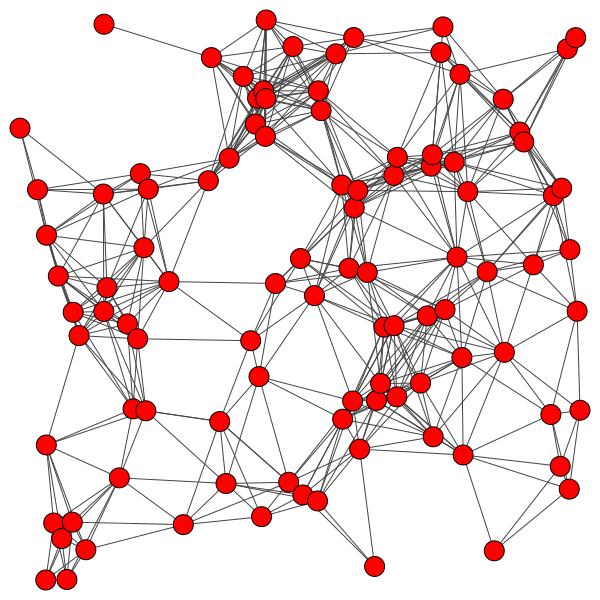

In [26]:
plot(g2)

In [27]:
# 由于算法的随机性，有可能您得到的确切图形不同，因此总结中的上述值与您得到的值不匹配。 这是正常的和预期的。
g2.get_edgelist()==g.get_edgelist() 

False

In [28]:
# 判断两张图是否是同构的。 一般情况下，这可能需要很长时间，特别是对于大图，但在我们的情况下，通过检查两个图的度分布可以很快得出答案。
g.isomorphic(g2)

False

# 4.Setting and retrieving attributes

igraph在其核心使用顶点和边ID。这些ID是从零开始的整数，并且在图的生命周期内的任何给定的时间实例上,它们总是连续的。这意味着无论何时删除顶点和边，一大组边和可能的顶点ID将被重新编号以确保连续性。现在让我们假设我们的图是一个社交网络，顶点代表人，边代表社交网络。维护顶点ID之间的关联的一种方法是，相应的名称是一个额外的Python列表，从顶点ID到名称的映射。这种方法的缺点是这个附加列表必须与原始图形的修改并行保持。幸运的是，igraph知道属性的概念，即与图的给定顶点或边相关的辅助对象，甚至整个图。从某种意义上说，每个图，顶点和边都表现为标准的Python字典：您可以将键值对添加到其中的任意一个，其中键表示属性的名称（唯一的限制是它必须是字符串）和表示属性本身的值。

In [29]:
g=Graph([(0,1),(0,2),(2,3),(3,4),(4,2),(2,5),(5,0),(6,3),(5,6)])

In [30]:
g.vs

In [31]:
g.vs['name']=['Alice','Bob','Claire','Dennis','Esther','Frank','George']

In [32]:
g.vs['age']=[25,31,18,47,22,23,50]

In [33]:
g.vs['gender']=['f','m','f','m','f','m','m']

In [34]:
g.es['is_formal']=[False,False,True,True,False,True,False,False]

In [35]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x000000000645B138>, 0, {'is_formal': False})

In [36]:
g.es[0].attributes()

{'is_formal': False}

In [37]:
g.es[0]['is_formal']=True

In [38]:
g['date']='2009-01-01'

In [39]:
print g['date']

2009-01-01


In [40]:
g.vs[3]['foo'] = 'bar'

In [41]:
g.vs['foo']

[None, None, None, 'bar', None, None, None]

In [42]:
del g.vs['foo']

In [43]:
g.vs['foo']

KeyError: 'Attribute does not exist'

# 5.Structural properties of graphs

In [44]:
g.degree()

[3, 1, 4, 3, 2, 3, 2]

In [45]:
g.degree(6)

2

In [46]:
g.degree([2,3,4])

[4, 3, 2]

In [47]:
g.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [48]:
ebs = g.edge_betweenness()

In [49]:
max_eb=max(ebs)

In [50]:
[g.es[idx].tuple for idx,eb in enumerate(ebs) if eb == max_eb]

[(0, 1), (0, 2)]

# 6.Querying vertices and edges based on attributes

In [51]:
g.vs.select(_degree=g.maxdegree())['name']

['Claire']

In [52]:
seq=g.vs.select(None)

In [53]:
len(seq)

0

In [54]:
graph=Graph.Full(10)

In [55]:
only_odd_vertices=graph.vs.select(lambda vertex:vertex.index % 2==1)

In [56]:
len(only_odd_vertices)

5

In [57]:
seq = graph.vs.select([2, 3, 7])

In [58]:
len(seq)

3

In [59]:
[v.index for v in seq]

[2, 3, 7]

In [60]:
seq=seq.select([0,2])

In [61]:
[v.index for v in seq]

[2, 7]

In [62]:
seq=graph.vs.select([2,3,7,'foo',3.5])

In [63]:
len(seq)

3

In [64]:
seq=graph.vs.select(2,3,7)

In [65]:
len(seq)

3

In [66]:
g.vs(age_lt=30)

In [68]:
g.vs(_degree_gt=2)

# 7.Layouts and plotting

In [69]:
layout=g.layout_kamada_kawai()

In [70]:
layout=g.layout('kamada_kawai')

In [72]:
layout = g.layout_reingold_tilford(root=2) #英文igraph0.6版可以  我使用的是igraph0.7的不行

TypeError: 'int' object is not iterable

In [73]:
layout = g.layout("rt", 2)

# 8.Drawing a graph using a layout

In [74]:
layout=g.layout('kk')

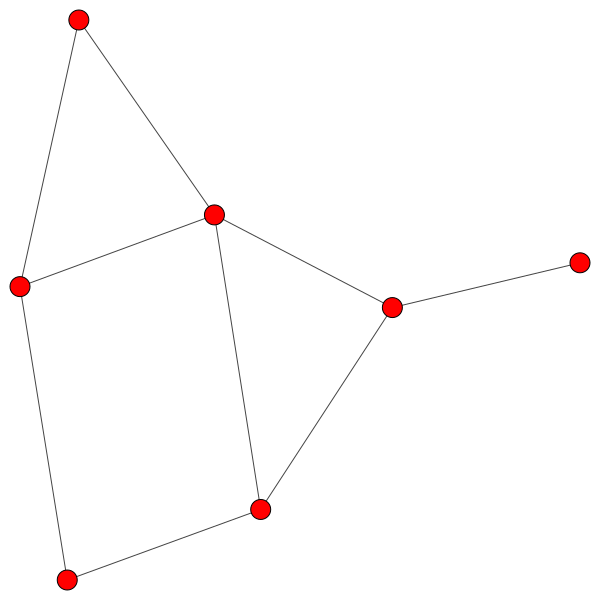

In [75]:
plot(g,layout=layout)

In [76]:
g.vs['label']=g.vs['name']

In [78]:
color_dict={'m':'blue','f':"pink"}

In [80]:
g.vs['color']=[color_dict[gender] for gender in g.vs['gender']]

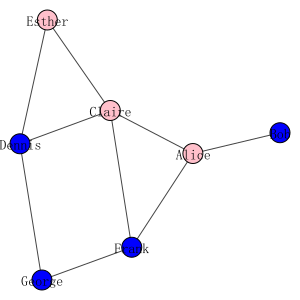

In [81]:
plot(g,layout=layout,bbox=(300,300),margin=20)

In [83]:
color_dict={'m':'black','f':'white'}

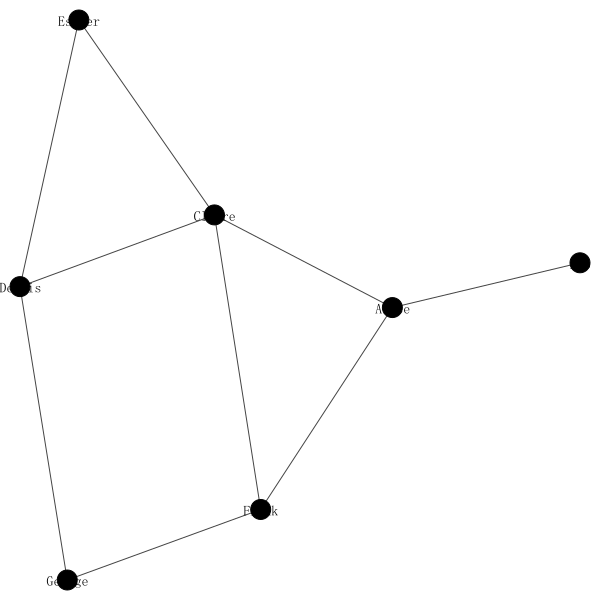

In [84]:
plot(g,layout=layout,vertex_color=[color_dict[gender] for gendr in g.vs['gender']])

In [85]:
visual_style={}

In [86]:
visual_style['vertex_size']=20

In [87]:
visual_style['vertex_color']=[color_dict[gender] for gender in g.vs['gender']]

In [88]:
visual_style['vertex_label']=g.vs['name']

In [89]:
visual_style['edge_width']=[1+2*int(is_formal) for is_formal in g.es['is_formal']]

In [90]:
visual_style['bbox']=(300,300)

In [91]:
visual_style['margin']=20

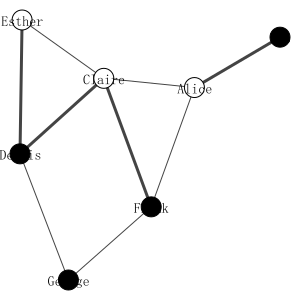

In [92]:
plot(g,**visual_style)

# 9.Specifying colors in plots

In [94]:
karate = Graph.Read_Pajek("karate.txt")


InternalError: Error at .\src\foreign.c:580: Parse error in Pajek file, line 1 (syntax error, unexpected ALNUM, expecting VERTICESLINE), Parse error